In [14]:
import numpy as np
from scipy.stats import norm,binom,expon,mode,poisson
import pandas as pd

Calculate the mean, median, mode and standard deviation for the problem
statements 1& 2.\
Problem Statement 1:
The marks awarded for an assignment set for a Year 8 class of 20 students were as
follows:
6 7 5 7 7 8 7 6 9 7 4 10 6 8 8 9 5 6 4 8

In [15]:
#Question 1

from collections import Counter

def median_func(x):
    x = np.sort(x)
    if x.shape[0] % 2 == 0:
        mid = x.shape[0]//2
        return (x[mid-1] + x[mid-2]) / 2
      
    else :
        mid = (x.shape[0] + 1) //2
        return x[mid-1]
    
def mode_func(x):
    c = Counter(x)
    mv = max(c.values())
    mk = []
    for key,value in c.items():
        if mv == value :
            mk.append(key)
    return mk,mv

def mean_func(x,ddof = 0):
    if  not isinstance(x , np.ndarray):
        x = np.array(x)
    return np.sum(x) / (x.shape[0] - ddof)

def std_func(x ,ddof = 0):
    if  not isinstance(x , np.ndarray):
        x = np.array(x)
    x_diff = x - mean_func(x)
    return np.sqrt((np.sum(x_diff ** 2)) / (x.shape[0]-ddof))
    
l = np.array([6,7,5,7,7,8,7,6,9,7,4,10,6,8,8,9,5,6,4,8])
print('Mean ',mean_func(l))
print('Standard Deviation ',std_func(l))
print('Mode ',mode_func(l)[0])
print('Median',median_func(l))

Mean  6.85
Standard Deviation  1.5898113095584647
Mode  [7]
Median 7.0


In [16]:
#using in numpy and scipy module

print('Mean ',l.mean())
print('Standard Deviation ',l.std(ddof = 0))
print('Mode ',mode(l)[0])
print('Median',np.median(l))

Mean  6.85
Standard Deviation  1.5898113095584647
Mode  [7]
Median 7.0


Problem Statement 2:
The number of calls from motorists per day for roadside service was recorded for a
particular month:\
28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170,
100, 75, 104, 97, 75,
123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109

In [17]:
#Question 2

x2 = np.array([28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170,
100, 75, 104, 97, 75,123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109])

print('Mean ',mean_func(x2))
print('Standard Deviation ',std_func(x2))
print('Mode ',mode_func(x2)[0])
print('Median',median_func(x2))

Mean  107.51428571428572
Standard Deviation  38.77287080168403
Mode  [75]
Median 100


$x$ = An Outcome \
$\mu = \sum [{x.P(x)}]$\
$\sigma ^2  =  \sum[{(x - \mu)^2 . P(x)}]$\
$P(x)$ = Probability of given outcome \
$\mu $ = Mean \
$\sigma $ = Standard Deviation \
$\sigma^2 $ = Variance 

Problem Statement 3:
The number of times I go to the gym in weekdays, are given below along with its
associated probability:\
x = 0, 1, 2, 3, 4, 5\
f(x) = 0.09, 0.15, 0.40, 0.25, 0.10, 0.01 \
Calculate the mean no. of workouts in a week. Also evaluate the variance involved in
it.

In [50]:
#Question 3

d = {'x':[0,1,2,3,4,5],'P(x)':[0.09,0.15,0.40,0.25,0.10,0.01]}
df = pd.DataFrame(data = d)
df['xP(x)'] = df['x'] * df['P(x)']
mu = df['xP(x)'].sum()
df['(x - mu)^2 * P(x)'] = ((df['x'] - mu)**2) * df['P(x)']
var = df['(x - mu)^2 * P(x)'].sum()


In [51]:
print('Mean ',mu)
print('Variance ',var)
df

Mean  2.15
Variance  1.2275


,x,P(x),xP(x),(x - mu)^2 * P(x)
0,0,0.09,0.00,0.416025
1,1,0.15,0.15,0.198375
2,2,0.40,0.80,0.009000
3,3,0.25,0.75,0.180625
4,4,0.10,0.40,0.342250
5,5,0.01,0.05,0.081225


$f(x) = 20e^{-20(x-12.5)} $

$Calculating$ $ CDF $

$F(k <= 12.6) = \int_{12.5}^{12.6} 20 e^{-20(x-12.5)} dx$ 

$F(k > 12.6) = 1 - F(k <= 12.6) $

Problem Statement 4 And Problem Statement 9:
Let the continuous random variable D denote the diameter of the hole drilled in an
aluminum sheet. The target diameter to be achieved is 12.5mm. Random
disturbances in the process often result in inaccuracy.
Historical data shows that the distribution of D can be modelled by the PDF (x) =
20e−20(x−12.5), x ≥ 12.5. If a part with diameter > 12.6 mm needs to be scrapped,
what is the proportion of those parts? What is the CDF when the diameter is of 11
mm? What is your conclusion regarding the proportion of scraps?

In [20]:
from scipy.integrate import quad
m = lambda x : 20 * np.exp(-20*(x - 12.5))
# find cdf of above function F(x <= 12.6)  
area = quad(m,12.5,12.6)[0]
#For F(x > 12.6) = 1 - F(x <= 12.6)
area = 1-area

print(area)

# for function  x > 12.5 
# for pdf 11  it is zero
# Probablity of having 12.6 or more diameter is only 13.5% in Accordance to function 

0.13533528323662825


$\mu = n.p$ \
$\sigma = \sqrt{n.p.q}$\
$q = 1 -p$ 

Problem Statement 5:
A company manufactures LED bulbs with a faulty rate of 30%. If I randomly select 6
chosen LEDs, what is the probability of having 2 faulty LEDs in my sample?
Calculate the average value of this process. Also evaluate the standard deviation
associated with it.

In [21]:
binom.pmf(n=6,p=0.6,k =2)

print("Mean ",binom.mean(n=6,p=0.6))
print("Standard Deviation ",binom.std(n=6,p=0.6))

Mean  3.5999999999999996
Standard Deviation  1.2


$$f(k) = \binom{n}{k} p^k (1-p)^{n-k}$$

Problem Statement 6:Gaurav and Barakha are both preparing for entrance exams. Gaurav attempts to
solve 8 questions per day with a correction rate of 75%, while Barakha averages
around 12 questions per day with a correction rate of 45%. What is the probability
that each of them will solve 5 questions correctly? What happens in cases of 4 and 6
correct solutions? What do you infer from it? What are the two main governing
factors affecting their ability to solve questions correctly? Give a pictorial
representation of the same to validate your answer.

In [22]:
n1 = 8
p1 = 0.75

n2 = 12
p2 = 0.45

print("Gaurav 4 question correct P(4) ",binom.pmf(n = n1,p =p1,k=4))
print("Barakha 4 question correct P(4) ",binom.pmf(n =n2,p = p2,k =4))

print("Gaurav 5 question correct P(5)",binom.pmf(n = n1,p =p1,k=5))
print("Barakha 5 question correct P(5)",binom.pmf(n =n2,p = p2,k =5))

print("Gaurav 6 question correct P(6)",binom.pmf(n = n1,p =p1,k=6))
print("Barakha 6 question correct P(6)",binom.pmf(n =n2,p = p2,k =6))

Gaurav 4 question correct P(4)  0.08651733398437506
Barakha 4 question correct P(4)  0.16996393213605795
Gaurav 5 question correct P(5) 0.20764160156250022
Barakha 5 question correct P(5) 0.22249823843265792
Gaurav 6 question correct P(6) 0.31146240234375017
Barakha 6 question correct P(6) 0.21238468214026424


In [23]:
import matplotlib.pyplot  as plt

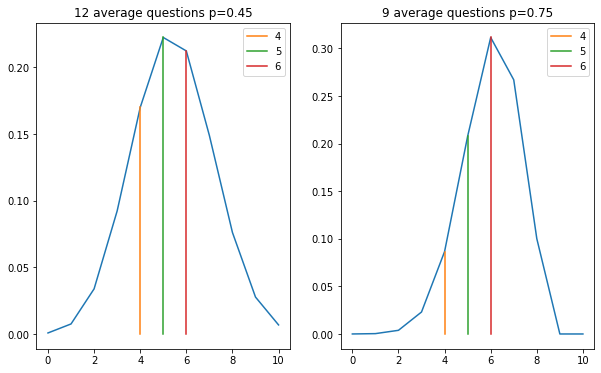

In [24]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))


t2 = np.arange(0,11,1)
m2 = binom.pmf(n=n2,p=p2,k = t2)

ax[0].plot(t2,m2)
f =  binom.pmf(n = n2,p =p2,k=4)
f1 = binom.pmf(n = n2,p =p2,k=5)
f2 = binom.pmf(n = n2,p =p2,k=6)

ax[0].plot([4,4],[f,0],label='4')
ax[0].plot([5,5],[f1,0],label='5')
ax[0].plot([6,6],[f2,0],label='6')
ax[0].title.set_text('12 average questions p=0.45')
ax[0].legend()

t1 = np.arange(0,11,1)
m1 = binom.pmf(n=n1,p=p1,k = t1)

ax[1].plot(t1,m1)
q =  binom.pmf(n = n1,p =p1,k=4)
q1 = binom.pmf(n = n1,p =p1,k=5)
q2 = binom.pmf(n = n1,p =p1,k=6)

ax[1].plot([4,4],[q,0],label='4')
ax[1].plot([5,5],[q1,0],label ='5')
ax[1].plot([6,6],[q2,0],label='6')
ax[1].legend()
ax[1].title.set_text('9 average questions p=0.75')
plt.show()

## for low no. of correct question(0,1,2,3,4,5 correct question) higher n(average no of questions) gives higher probability
## but for high no. of correct question(6,7,8 correct questions) high the p gives higher probability
## therefore depends on n and p

$$P(x) = \frac{\lambda^x . e^{-\lambda}}{x!}$$

Problem Statement 7:
Customers arrive at a rate of 72 per hour to my shop. What is the probability of x
customers arriving in 4 minutes? a) 5 customers, b) not more than 3 customers, c)
more than 3 customers. Give a pictorial representation of the same to validate your
answer.

In [34]:
lam = 72 / 15

#a
m1 = poisson.pmf(k = 5,mu = lam)
print("P(x=5) ",m1)
#b
m2 = poisson.cdf(k = 3,mu = lam)
print("P(x<=3)",m2)
#c
print("P(x>3)",1 - m2)

P(x=5)  0.17474768364388296
P(x<=3) 0.2942299164965642
P(x>3) 0.7057700835034357


$$P(x) = \frac{\lambda^x . e^{-\lambda}}{x!}$$

Problem Statement 8:
I work as a data analyst in Aeon Learning Pvt. Ltd. After analyzing data, I make
reports, where I have the efficiency of entering 77 words per minute with 6 errors per
hour. What is the probability that I will commit 2 errors in a 455-word financial report?
What happens when the no. of words increases/decreases (in case of 1000 words,
255 words\
How is the $\lambda$ affected?\
How does it influence the PMF?\
Give a pictorial representation of the same to validate your answer.

In [ ]:
lam=lambda x : (6/(77*60)) * x

m1 = poisson.pmf(k = 2,mu = lam(455))
m2 = poisson.pmf(k = 2,mu = lam(255))
m3 = poisson.pmf(k = 2,mu = lam(1000))
print("2 Error with 455 word "m1)
print("2 Error with 255 word "m2)
print("2 Error with 1000 word ",m3)

#lambda is affected and no. of words is directly proportional to lambda

In [ ]:
fig ,ax = plt.subplots(nrows =1 ,ncols = 3 ,figsize=(12,6))
x1 = np.arange(poisson.ppf(0.01,lam(1000)),poisson.ppf(0.99999,lam(1000)))
y1 = poisson.pmf(k=x1,mu = lam(1000))
ax[0].plot([2,2],[m3,0] , label='2 error')
ax[0].plot(x1,y1)
ax[0].title.set_text('1000 words')
ax[0].legend()

x2 = np.arange(poisson.ppf(0.01,lam(255)),poisson.ppf(0.99999,lam(255)))
y2 = poisson.pmf(k=x2,mu = lam(255))
ax[1].plot([2,2],[m2,0],label='2 error')
ax[1].plot(x2,y2)
ax[1].title.set_text('255 words')
ax[1].legend()

x3 = np.arange(poisson.ppf(0.01,lam(455)),poisson.ppf(0.99999,lam(455)))
y3 = poisson.pmf(k=x3,mu = lam(455))
ax[2].plot([2,2],[m1,0],label='2 error')
ax[2].plot(x3,y3)
ax[2].title.set_text('455 words')
ax[2].legend()
plt.show()

# words increases, probabilty of occurring of error increases 
# lambda is effected by words and it is directly proportional to it

Problem Statement 10:
Please compute the following:
1. P(Z > 1.26), P(Z < −0.86), P(Z > −1.37), P(−1.25 < Z < 0.37), . P(Z ≤ −4.6)
2. Find the value z such that P(Z > z) = 0.05
3. Find the value of z such that p(−z < Z < z) = 0.99


In [26]:
n = norm(loc = 0 , scale =1)

print("P(Z> 1.26) ",n.sf(1.26))


print("P(Z < -0.86) ",n.cdf(-.86))

print("P(Z > −1.37) ",n.sf(-1.37))

print("P(−1.25 < Z < 0.37) ",n.cdf(0.37) - n.cdf(-1.25))

print("P(Z ≤ −4.6) ",n.cdf(-4.6))

print("P(Z >z)=0.05: z = ",n.isf(0.05),"or",n.ppf(1-0.05))

P(Z> 1.26)  0.1038346811213004
P(Z < -0.86)  0.1948945212518084
P(Z > −1.37)  0.914656549178033
P(−1.25 < Z < 0.37)  0.5386589811336914
P(Z ≤ −4.6)  2.1124547025028537e-06
P(Z >z)=0.05: z =  1.6448536269514729 or 1.6448536269514722


In [30]:
#Find the value of z such that p(−z < Z < z) = 0.99
# p(−z < Z < z) == 2 * p(0 < Z < z) == 0.99
# p(0 < Z < z) = P(Z<z) - P(Z <0) since P(Z<0) == 0.5
m = (0.99 / 2) + 0.5
z = n.ppf(m)
print("Value of z = ",z)
#p(−z < Z < z) 
#validation
n.cdf(z) - n.cdf(-z)


Value of z =  2.5758293035489004


0.99

Problem Statement 11:
The current flow in a copper wire follow a normal distribution with a mean of 10 mA
and a variance of 4 (mA)2.\
What is the probability that a current measurement will exceed 13 mA?\
What is the probability that a current measurement is between 9 and 11mA? \
Determine the current measurement which has a probability of 0.98.

In [31]:
def getZscore(x_bar,mu,st,n=1):
    return (x_bar - mu)/(st/(n**0.5))

In [33]:
#
mu = 10
st = 4**0.5
print("P(X>13)",n.sf(getZscore(13,10,2)))

print("P(9<X<11) ",n.cdf(getZscore(11,10,2))-n.cdf(getZscore(9,10,2)))

#  get zscore from area 0.98
z = n.ppf(0.98)
print("Current which has a probability of 0.98 ",z * st + mu,"mA")

P(X>13) 0.06680720126885807
P(9<X<11)  0.38292492254802624
Current which has a probability of 0.98  14.107497821263646 mA


Problem Statement 12:
The shaft in a piston has its diameter normally distributed with a mean of 0.2508 inch
and a standard deviation of 0.0005 inch. The specifications of the shaft are 0.2500 ∓
0.0015 inch. What proportion of shafts are in sync with the specifications? If the
process is centered so that the mean is equal to the target value of 0.2500, what
proportion of shafts conform to the new specifications? What is your conclusion from
this experiment?

In [35]:
def getZscore(x_bar,mu,st,n=1):
    return (x_bar - mu)/(st/(n**0.5))

upp,low=0.2500 + 0.0015 ,0.2500  - 0.0015

mu = 0.2508
st = 0.0005

print(n.cdf(getZscore(upp,mu,st)) - n.cdf(getZscore(low,mu,st)))

# if mu == 0.2500
mu2 = 0.2500
print(n.cdf(getZscore(upp,mu2,st)) - n.cdf(getZscore(low,mu2,st)))

# when mean is '0.2508' then proportion of shafts with appropriate specification is less because mean is near to upper limit
#where as when mean is 0.2500 it is prefectly in middle therefore proportion is higher than above mean.

0.91924122831152
0.9973002039367398


# Problem Statement 4 and 9 are repeated in assignment so I Have done it only One time 